# Data Prep

In [1]:
import os
from pandas import read_csv
import pandas as pd
from collections import Counter

In [2]:
data_path = '/Users/subashkhanal/Desktop/BMI633/ADNI_Genetics/Genomics/data/'

In [3]:
N = 100
#Gene ranking based on ttest
ttest = read_csv(os.path.join(data_path,'t_test_0.05_geneExpr_Unfiltered_bl.csv')).sort_values('CN_AD')
important_probes = ttest.sort_values('CN_AD'+'_c')['Gene'][0:N] #suffix _c to use the FDR corrected p values

#Quality controlled GWAS data
GWAS_data = read_csv(os.path.join(data_path,'GWAS_data_Dx_bl.csv'),na_values=["00"],low_memory=False)
GWAS_data = GWAS_data.iloc[:, 0:N+6] #Only top N snps
GWAS_data = GWAS_data.drop(columns=['Unnamed: 0'])
GWAS_data.dropna(inplace=True)

#Gene Expression Data
Gene_expr = read_csv(os.path.join(data_path,'Unfiltered_gene_expr_dx.csv'),low_memory=False)
Gene_expr = Gene_expr[['Unnamed: 0','AGE','PTGENDER','PTEDUCAT','DX_bl']+list(important_probes)]

In [4]:
lastsnp = GWAS_data.columns[-1]
lastsnp

'rs17755381'

In [5]:
common_subjects = set(GWAS_data['PTID']).intersection(set(Gene_expr['Unnamed: 0']))

In [6]:
GWAS_data_final = GWAS_data[pd.DataFrame(GWAS_data.PTID.tolist()).isin(common_subjects).any(1).values]

In [7]:
Gene_expr_final = Gene_expr[pd.DataFrame(Gene_expr['Unnamed: 0'].tolist()).isin(common_subjects).any(1).values]

In [8]:
Counter(GWAS_data_final.DIAG)

Counter({'CN': 210, 'AD': 24})

In [9]:
Counter(Gene_expr_final.DX_bl)

Counter({'CN': 210, 'AD': 24})

In [10]:
cols = Gene_expr_final.columns
Gene_expr_final.columns = ['PTID','AGE','GENDER','EDU','DIAG']+list(cols[5:])
Gene_expr_final

,PTID,AGE,GENDER,EDU,DIAG,11761978_at_ARHGEF12,11754382_a_at_SMIM5,11755705_a_at_SMIM5,11758611_s_at_TRIM10,11724079_s_at_E2F2,...,11721674_s_at_GLRX5,AFFX-DapX-5_at_AFFX-Nonspecific-GC14_at,11722181_a_at_ATP6V1C1,11747106_a_at_RREB1,11722970_a_at_CREB5,11730765_at_CD177,11741967_a_at_CDYL,11719884_s_at_KAZN,11741528_a_at_ACP1,11742801_a_at_MAP2K3
0,116_S_1249,70.8,Female,15.0,CN,4.573,7.203,7.587,7.559,9.251,...,9.832,9.965,6.100,3.281,10.055,2.685,4.860,4.284,5.958,10.105
1,037_S_4410,69.1,Female,14.0,CN,4.969,5.378,5.535,5.297,8.335,...,9.058,9.585,6.286,3.329,9.610,2.871,4.361,3.639,5.993,9.708
2,006_S_4153,79.3,Male,20.0,AD,4.805,6.094,6.355,6.496,8.940,...,9.448,10.024,5.722,2.977,9.427,3.387,3.853,3.345,5.910,10.299
3,116_S_1232,72.1,Female,14.0,CN,6.287,8.110,8.376,9.000,10.421,...,10.705,10.282,5.833,3.139,9.529,2.574,5.427,3.537,6.619,10.994
15,037_S_4308,74.0,Male,16.0,CN,4.270,5.541,5.888,6.708,8.958,...,9.834,9.968,6.127,3.192,9.773,3.866,4.951,3.501,5.995,10.113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,014_S_4401,67.5,Female,20.0,CN,3.908,7.351,7.594,7.642,9.441,...,9.454,10.006,6.849,3.292,10.848,4.372,4.699,4.844,5.894,10.702
730,137_S_0459,72.9,Male,16.0,CN,5.065,8.365,8.638,8.293,9.558,...,10.500,10.853,5.430,3.470,9.011,4.413,5.340,2.896,6.788,10.641
732,023_S_4164,72.6,Male,12.0,CN,5.631,7.049,7.388,8.292,10.198,...,10.101,10.403,6.215,2.915,9.104,3.277,5.306,3.307,6.250,10.500
734,082_S_4339,84.3,Male,17.0,CN,4.563,7.017,7.071,7.277,9.013,...,9.600,10.840,6.482,3.540,9.496,4.845,4.973,3.708,5.536,10.614


In [11]:
GWAS_data_final

,PTID,AGE,GENDER,EDU,DIAG,rs2075650,rs11253696,rs2136613,rs157580,rs6116375,...,rs17763769,rs699096,rs1467719,rs4351677,rs12205042,rs6585082,rs10833513,rs6070893,rs3785602,rs17755381
0,014_S_0520,77.7,Female,16,CN,GG,GG,TT,CC,CC,...,GA,GG,AA,GG,TC,AG,TT,TC,GG,GG
3,018_S_0055,75.5,Male,20,CN,GG,GG,TT,CC,CC,...,GA,GA,AA,GG,TC,AG,CT,TC,GG,GG
4,027_S_0118,80.4,Male,20,CN,GG,GG,TT,CC,CT,...,GG,GG,AA,GG,CC,AA,CT,CC,GT,GG
9,098_S_0171,78.3,Female,17,CN,GG,GG,TT,CC,CT,...,GG,AA,AG,GT,TT,GG,CT,TC,GG,GA
13,011_S_0023,71.7,Male,14,CN,GG,GG,TT,CC,CC,...,GA,GA,AA,GG,TT,AG,CC,TT,TT,GG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,018_S_4400,71.1,Male,20,CN,AA,GT,TC,CC,CT,...,AA,GA,AG,GT,TC,GG,CC,TC,GG,GA
541,041_S_4014,80.7,Male,16,CN,GG,GG,TT,CC,CT,...,GA,GG,AA,GG,TC,AG,CC,TC,GG,GG
542,094_S_4282,89.6,Male,12,AD,GG,GG,TT,CC,TT,...,GA,GG,AA,GG,TC,AG,CT,TC,GG,GA
543,033_S_4179,83.0,Male,20,CN,GG,GG,TT,CC,CC,...,GG,GA,AG,GT,TC,AA,CC,TC,TT,GA


In [12]:
GWAS_GeneExpr_df = pd.merge(GWAS_data_final, Gene_expr_final,  how='left', on=['PTID','AGE','GENDER','EDU','DIAG'])

In [13]:
GWAS_GeneExpr_df

,PTID,AGE,GENDER,EDU,DIAG,rs2075650,rs11253696,rs2136613,rs157580,rs6116375,...,11721674_s_at_GLRX5,AFFX-DapX-5_at_AFFX-Nonspecific-GC14_at,11722181_a_at_ATP6V1C1,11747106_a_at_RREB1,11722970_a_at_CREB5,11730765_at_CD177,11741967_a_at_CDYL,11719884_s_at_KAZN,11741528_a_at_ACP1,11742801_a_at_MAP2K3
0,014_S_0520,77.7,Female,16,CN,GG,GG,TT,CC,CC,...,9.871,10.176,5.191,3.540,8.538,2.485,5.077,2.674,6.290,10.536
1,018_S_0055,75.5,Male,20,CN,GG,GG,TT,CC,CC,...,9.944,10.523,6.583,2.972,10.479,6.686,4.785,4.558,5.811,10.613
2,027_S_0118,80.4,Male,20,CN,GG,GG,TT,CC,CT,...,9.393,10.382,6.507,3.385,9.621,3.810,5.149,2.493,5.991,10.088
3,098_S_0171,78.3,Female,17,CN,GG,GG,TT,CC,CT,...,9.573,11.014,5.292,3.731,9.399,2.754,5.064,3.408,6.207,10.225
4,011_S_0023,71.7,Male,14,CN,GG,GG,TT,CC,CC,...,11.322,10.843,5.077,3.411,8.102,2.523,5.985,2.840,6.854,11.617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,018_S_4400,71.1,Male,20,CN,AA,GT,TC,CC,CT,...,9.139,10.191,5.922,3.298,8.769,3.072,5.312,3.610,5.895,10.429
230,041_S_4014,80.7,Male,16,CN,GG,GG,TT,CC,CT,...,9.786,10.949,6.075,3.327,8.990,2.547,5.556,2.801,6.631,10.307
231,094_S_4282,89.6,Male,12,AD,GG,GG,TT,CC,TT,...,9.734,10.503,5.373,3.213,9.125,2.851,4.841,3.564,6.244,10.545
232,033_S_4179,83.0,Male,20,CN,GG,GG,TT,CC,CC,...,10.077,10.888,6.482,3.019,9.690,3.110,4.949,4.459,5.678,10.190


In [14]:
Counter(GWAS_GeneExpr_df.DIAG)

Counter({'CN': 210, 'AD': 24})

# Classification

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# https://machinelearningmastery.com/feature-selection-with-categorical-data/
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# load the dataset
def load_dataset(df,df_type):
    # load the dataset as a pandas DataFrame
    data = df
    y = data.DIAG.values  
    if df_type == 'GWAS_GeneExpr':
        numeric_df = data[['AGE','EDU']+list(important_probes)]
        categorical_df = data[list(set(data.columns)-set(numeric_df.columns)-set(['DIAG']))].astype(str)

    if df_type == 'GWAS':
        numeric_df = data[['AGE','EDU']]
        categorical_df = data[list(set(data.columns)-set(numeric_df.columns)-set(['DIAG']))].astype(str)
        
    if df_type == 'GeneExpr':
        numeric_df = data[['AGE','EDU']+list(important_probes)]
        categorical_df = data[list(set(data.columns)-set(numeric_df.columns)-set(['DIAG']))].astype(str)
        
    return np.array(numeric_df), categorical_df, y
 
# prepare input data
def prepare_inputs(X):
    oe = OneHotEncoder()
    oe.fit(X)
    X_enc = oe.transform(X)
    return X_enc
 
# prepare target
def prepare_targets(y):
    le = LabelEncoder()
    le.fit(y)
    y = le.transform(y)
    return y

def overall_exp(df,df_type):
    
    # load the dataset
    numeric_df, categorical_df, y = load_dataset(df,df_type)
    X_enc = prepare_inputs(categorical_df)
    y_enc = prepare_targets(y)

    X_cat_numeric = hstack((X_enc,numeric_df[:,:]))

    ######################################################################

    #                            GRID SEARCH

    ######################################################################

    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import (RandomForestClassifier,
                                  GradientBoostingClassifier)

    X, y = X_cat_numeric, y_enc
    # define model
    model = GradientBoostingClassifier()
    # define evaluation
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # define search space
    space = dict()
    space['n_estimators'] = [50,100,250,500,1000,2000]

    scoring = {'AUC': 'roc_auc', 'Balanced Accuracy':'balanced_accuracy'}
    # define search
    search = GridSearchCV(model, space,n_jobs=-1, cv=cv,scoring=scoring, refit='AUC', return_train_score=True)
    # execute search
    result = search.fit(X, y)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

    results = search.cv_results_


    ######################################################################

    #                            AUC PLOT

    ######################################################################


    #https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

    # Author: Raghav RV <rvraghav93@gmail.com>
    # License: BSD

    results = search.cv_results_

    import numpy as np
    from matplotlib import pyplot as plt

    from sklearn.datasets import make_hastie_10_2
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score
    from sklearn.tree import DecisionTreeClassifier

    print(__doc__)


    plt.figure(figsize=(13, 13))
    plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
              fontsize=16)

    plt.xlabel("param_n_estimators")
    plt.ylabel("Score")

    ax = plt.gca()
    ax.set_xlim(50, 2002)
    ax.set_ylim(0.50, 1)

    # Get the regular numpy array from the MaskedArray
    X_axis = np.array(results['param_n_estimators'].data, dtype=float)

    for scorer, color in zip(sorted(scoring), ['g', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                            sample_score_mean + sample_score_std,
                            alpha=0.1 if sample == 'test' else 0, color=color)
            ax.plot(X_axis, sample_score_mean, style, color=color,
                    alpha=1 if sample == 'test' else 0.7,
                    label="%s (%s)" % (scorer, sample))

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot([X_axis[best_index], ] * 2, [0, best_score],
                linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

        # Annotate the best score for that scorer
        ax.annotate("%0.2f" % best_score,
                    (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()


Best Score: 0.806825396825397
Best Hyperparameters: {'n_estimators': 2000}
Automatically created module for IPython interactive environment


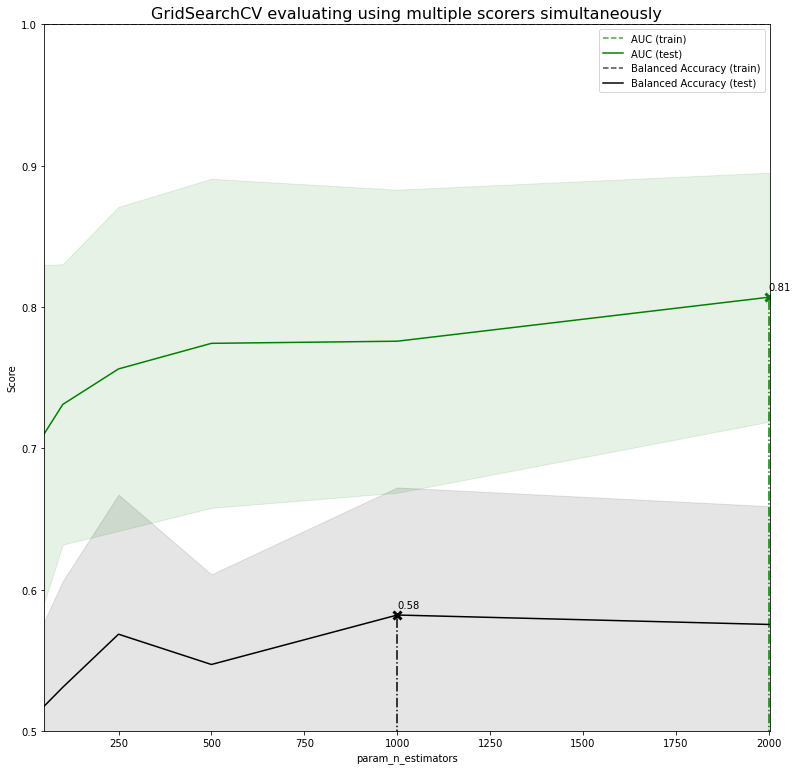

In [16]:
df = GWAS_GeneExpr_df #Options: ['GWAS_data_final','Gene_expr_final','GWAS_GeneExpr_df']
df_type = 'GWAS_GeneExpr' # Options: ['GWAS_GeneExpr','GWAS','GeneExpr']
overall_exp(df,df_type)

Best Score: 0.6531746031746032
Best Hyperparameters: {'n_estimators': 2000}
Automatically created module for IPython interactive environment


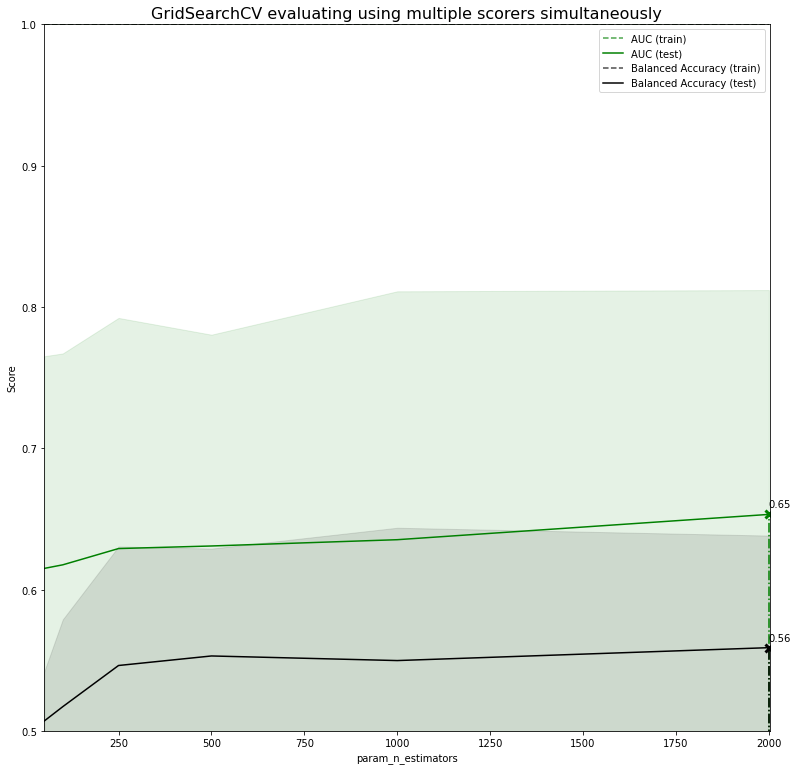

In [17]:
df = GWAS_data_final #Options: ['GWAS_data_final','Gene_expr_final','GWAS_GeneExpr_df']
df_type = 'GWAS' # Options: ['GWAS_GeneExpr','GWAS','GeneExpr']
overall_exp(df,df_type)

Best Score: 0.8080555555555555
Best Hyperparameters: {'n_estimators': 2000}
Automatically created module for IPython interactive environment


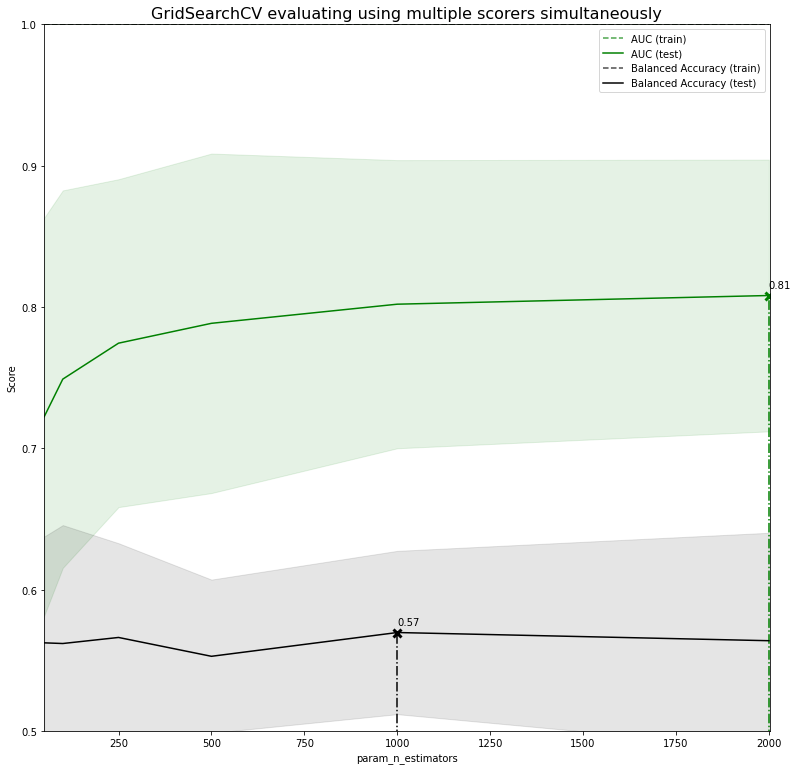

In [18]:
df = Gene_expr_final #Options: ['GWAS_data_final','Gene_expr_final','GWAS_GeneExpr_df']
df_type = 'GeneExpr' # Options: ['GWAS_GeneExpr','GWAS','GeneExpr']
overall_exp(df,df_type)

# Conclusion

Major Issue : While merging both the dataset gets smaller, cannot really use SMOTE with categorical data.
Still would be useful to see ranking of combined features {SNP+GeneExpression}